# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("data.xlsx")

# PART 2: DATA WRANGLING, PREPROCESSING AND TRANSFORMATION:

In [3]:
df

,Unnamed: 0,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,0,NaN,NaN,NaN,NaN,10.2,-7.0,5.6,-0.8,Iris-setosa
1,1,4.9,3.0,1.4,0.2,9.8,-6.0,5.6,-0.8,Iris-setosa
2,2,4.7,3.2,NaN,NaN,9.4,-6.4,5.2,-0.8,Iris-setosa
3,3,4.6,NaN,1.5,NaN,9.2,-6.2,6.0,-0.8,Iris-setosa
4,4,NaN,3.6,NaN,NaN,10.0,-7.2,5.6,-0.8,Iris-setosa
...,...,...,...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,13.4,-6.0,20.8,-9.2,Iris-virginica
146,146,6.3,2.5,5.0,1.9,12.6,-5.0,20.0,-7.6,Iris-virginica
147,147,6.5,3.0,5.2,2.0,13.0,-6.0,20.8,-8.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,12.4,-6.8,21.6,-9.2,Iris-virginica


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sepal depth     130 non-null    float64
 1   sepal diameter  130 non-null    float64
 2   petal depth     130 non-null    float64
 3   petal diameter  100 non-null    float64
 4   sepal length    150 non-null    float64
 5   sepal width     150 non-null    float64
 6   petal length    150 non-null    float64
 7   petal width     150 non-null    float64
 8   target          150 non-null    object 
dtypes: float64(8), object(1)
memory usage: 10.7+ KB


In [6]:
colomns=df.columns
print("data type of each coloumns:    ")
for i in colomns:
    print(i,end="   ")#,end=":      ",dtype(df[i]))
    print(df[i].dtype)

data type of each coloumns:    
sepal depth   float64
sepal diameter   float64
petal depth   float64
petal diameter   float64
sepal length   float64
sepal width   float64
petal length   float64
petal width   float64
target   object


# Data cleaning

In [7]:
df.isnull().sum()

sepal depth       20
sepal diameter    20
petal depth       20
petal diameter    50
sepal length       0
sepal width        0
petal length       0
petal width        0
target             0
dtype: int64

In [8]:
len(df['petal diameter'])

150

In [9]:
df['petal diameter'].describe()

count    100.000000
mean       1.453000
std        0.685117
min        0.100000
25%        1.100000
50%        1.500000
75%        2.000000
max        2.500000
Name: petal diameter, dtype: float64

In [10]:
df['sepal depth'].fillna(df['sepal depth'].mean(),inplace=True)
df['sepal diameter'].fillna(df['sepal diameter'].mean(),inplace=True)
df['petal depth'].fillna(df['petal depth'].mean(),inplace=True)
df['petal diameter'].fillna(df['petal diameter'].mean(),inplace=True)




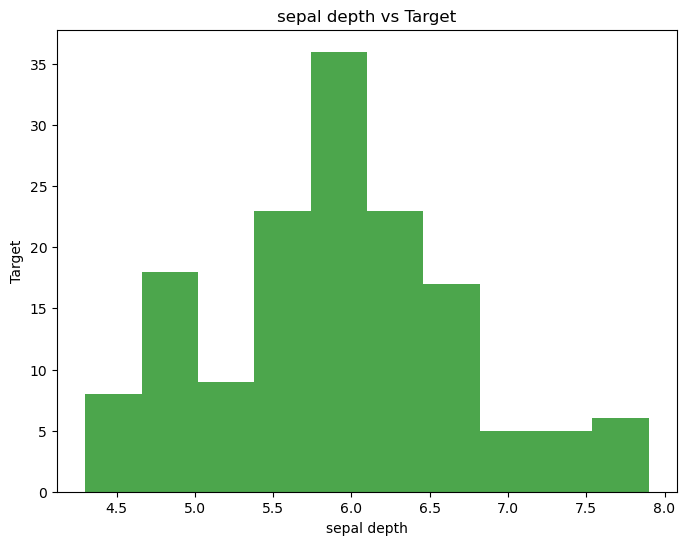

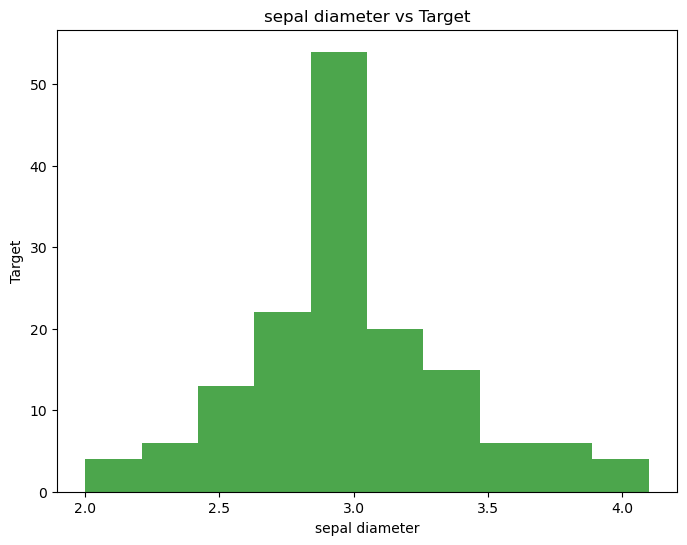

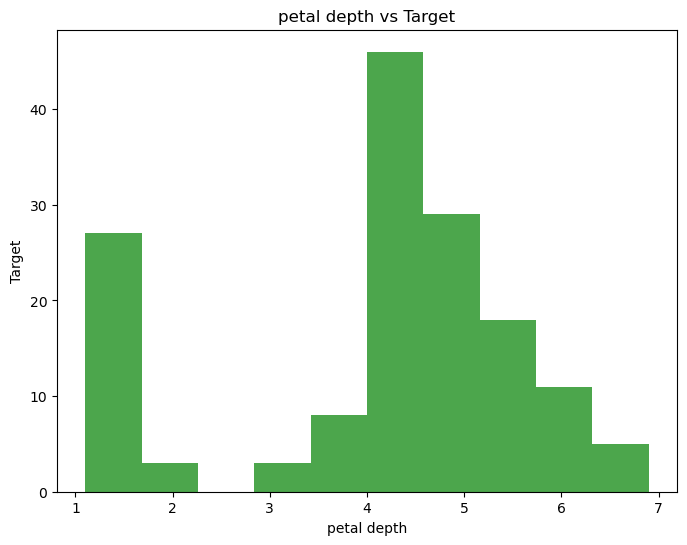

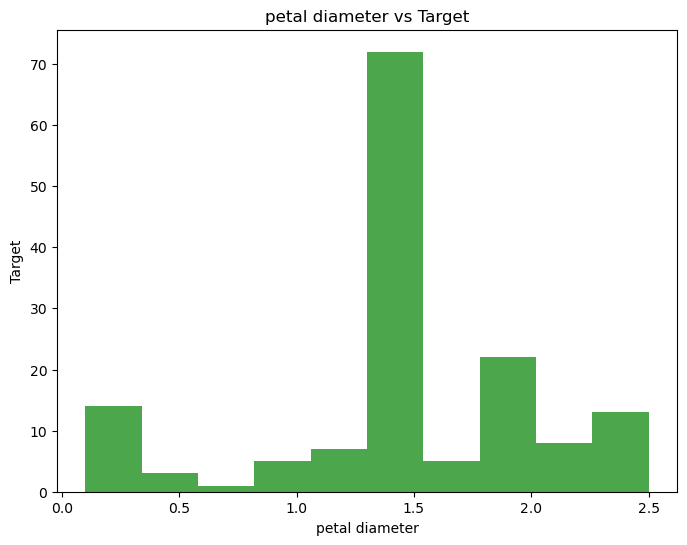

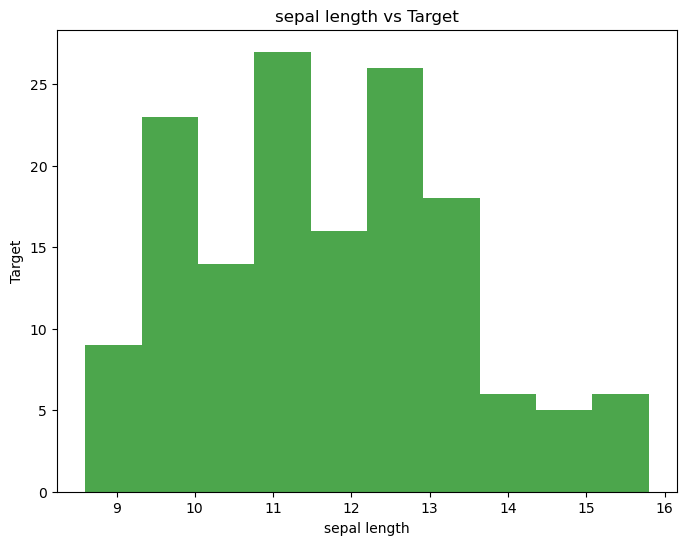

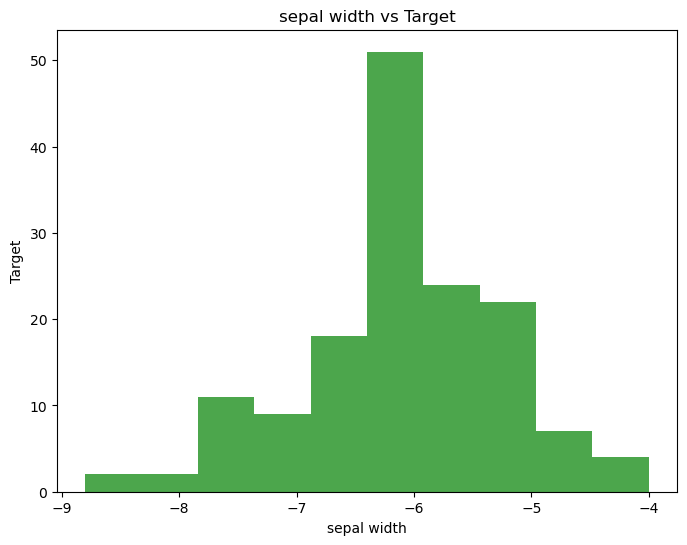

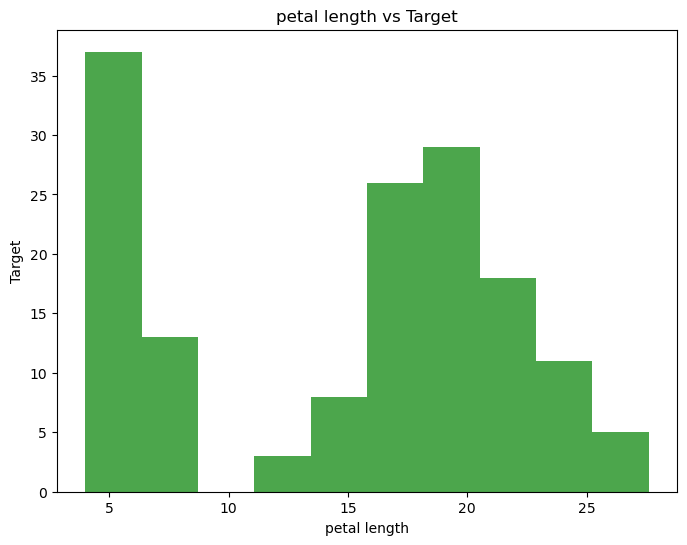

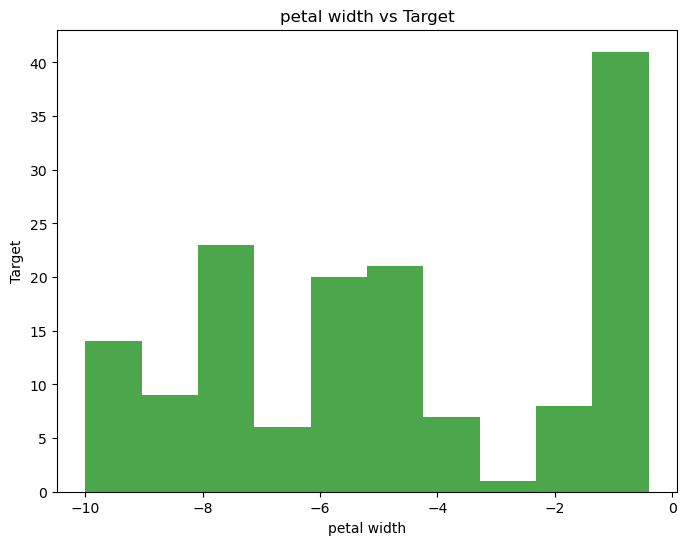

In [11]:
for column in df.columns[:-1]:  # Exclude the last column (dependent variable)
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=10, color='green', alpha=0.7)
    plt.title(f'{column} vs Target')
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.show()

In [12]:
tar=df['target']
df.drop('target',axis=1,inplace=True)
df.columns

Index(['sepal depth', 'sepal diameter', 'petal depth', 'petal diameter',
       'sepal length', 'sepal width', 'petal length', 'petal width'],
      dtype='object')

In [13]:
def replace_outliers_with_mean(dataframe, columns, iqr_multiplier=1.5):
    df = dataframe.copy()

    for column_name in columns:
        # Calculate the first and third quartiles (Q1 and Q3)
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + iqr_multiplier * IQR
        lower_bound = Q1 - iqr_multiplier * IQR
        df[column_name] = df[column_name].apply(lambda x: df[column_name].mean() if x > upper_bound or x < lower_bound else x)

    return df

In [14]:
df=replace_outliers_with_mean(df,df.columns,1.5)

In [15]:
df['target']=tar
df.isnull().sum()


sepal depth       0
sepal diameter    0
petal depth       0
petal diameter    0
sepal length      0
sepal width       0
petal length      0
petal width       0
target            0
dtype: int64

# data transformation:

In [16]:
from sklearn.preprocessing import LabelEncoder

#simple imputer use for catagarical values
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print(label_mapping)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [17]:
df.mean()

sepal depth        5.901538
sepal diameter     2.986231
petal depth        4.642462
petal diameter     1.589673
sepal length      11.686667
sepal width       -6.074880
petal length      15.034667
petal width       -4.794667
target             1.000000
dtype: float64

In [18]:
df['target'].unique()

array([0, 1, 2])

# Normalization and Standardization:

In [19]:
column_datatypes = df.dtypes
print("\nDatatypes of all columns:")
print(column_datatypes)


Datatypes of all columns:
sepal depth       float64
sepal diameter    float64
petal depth       float64
petal diameter    float64
sepal length      float64
sepal width       float64
petal length      float64
petal width       float64
target              int32
dtype: object


In [20]:
colo=df.iloc[:,0:8]
tr=df.iloc[:,8:9]
df.columns

Index(['sepal depth', 'sepal diameter', 'petal depth', 'petal diameter',
       'sepal length', 'sepal width', 'petal length', 'petal width', 'target'],
      dtype='object')

<Axes: xlabel='0', ylabel='Density'>

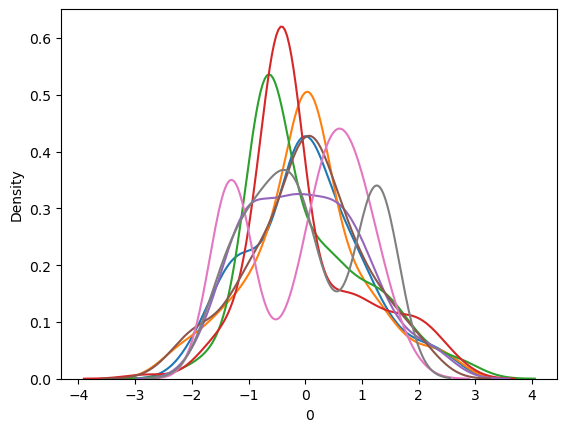

In [21]:
import seaborn as sb
from sklearn.preprocessing import StandardScaler
housing_df_standard_scale=pd.DataFrame(StandardScaler().fit_transform(colo))
 
sb.kdeplot(housing_df_standard_scale[0])
sb.kdeplot(housing_df_standard_scale[1])
sb.kdeplot(housing_df_standard_scale[2])
sb.kdeplot(housing_df_standard_scale[3])

sb.kdeplot(housing_df_standard_scale[4])
sb.kdeplot(housing_df_standard_scale[5])
sb.kdeplot(housing_df_standard_scale[6])
sb.kdeplot(housing_df_standard_scale[7])


In [22]:
housing_df_standard_scale

,0,1,2,3,4,5,6,7
0,1.146890e-15,0.057178,-0.686925,-0.386449,-0.900681,-1.190590,-1.341272,1.312977
1,-1.293270e+00,0.041104,-0.686925,-0.386449,-1.143017,0.096367,-1.341272,1.312977
2,-1.551527e+00,0.638145,-0.686925,-0.386449,-1.385353,-0.418415,-1.398138,1.312977
3,-1.680655e+00,0.057178,-0.686925,-0.386449,-1.506521,-0.161024,-1.284407,1.312977
4,1.146890e-15,1.832227,-0.686925,-0.386449,-1.021849,-1.447981,-1.341272,1.312977
...,...,...,...,...,...,...,...,...
145,1.031040e+00,0.041104,0.726625,2.008475,1.038005,0.096367,0.819624,-1.447956
146,5.145269e-01,-1.451498,0.465970,0.877460,0.553333,1.383324,0.705893,-0.922064
147,7.727836e-01,0.041104,0.726625,1.160214,0.795669,0.096367,0.819624,-1.053537
148,3.853985e-01,1.235186,0.987279,2.008475,0.432165,-0.933198,0.933356,-1.447956


In [23]:
df=housing_df_standard_scale
df.rename(columns={0:'sepal depth',1:'sepal diameter',2:'petal depth',3:'petal diameter',4:
       'sepal length',5:'sepal width',6:'petal length',7: 'petal width'}, inplace=True)
df['target']=tr
df

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,1.146890e-15,0.057178,-0.686925,-0.386449,-0.900681,-1.190590,-1.341272,1.312977,0
1,-1.293270e+00,0.041104,-0.686925,-0.386449,-1.143017,0.096367,-1.341272,1.312977,0
2,-1.551527e+00,0.638145,-0.686925,-0.386449,-1.385353,-0.418415,-1.398138,1.312977,0
3,-1.680655e+00,0.057178,-0.686925,-0.386449,-1.506521,-0.161024,-1.284407,1.312977,0
4,1.146890e-15,1.832227,-0.686925,-0.386449,-1.021849,-1.447981,-1.341272,1.312977,0
...,...,...,...,...,...,...,...,...,...
145,1.031040e+00,0.041104,0.726625,2.008475,1.038005,0.096367,0.819624,-1.447956,2
146,5.145269e-01,-1.451498,0.465970,0.877460,0.553333,1.383324,0.705893,-0.922064,2
147,7.727836e-01,0.041104,0.726625,1.160214,0.795669,0.096367,0.819624,-1.053537,2
148,3.853985e-01,1.235186,0.987279,2.008475,0.432165,-0.933198,0.933356,-1.447956,2


# PART 3: FEATURE SELECTION

# FILTER: Low variance, Pearson’s Correlation, Mutual information

In [24]:
correlation_matrix = df.corr()

correlation_matrix

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
sepal depth,1.000000,0.026385,0.792221,0.565930,0.938352,0.032663,0.796027,-0.743394,0.723059
sepal diameter,0.026385,1.000000,0.104212,0.249672,-0.035172,-0.869760,-0.243366,0.180550,-0.253809
petal depth,0.792221,0.104212,1.000000,0.782687,0.820980,-0.009130,0.781562,-0.757610,0.764364
petal diameter,0.565930,0.249672,0.782687,1.000000,0.558296,-0.164336,0.558730,-0.663635,0.636317
sepal length,0.938352,-0.035172,0.820980,0.558296,1.000000,0.113950,0.871754,-0.817954,0.782561
sepal width,0.032663,-0.869760,-0.009130,-0.164336,0.113950,1.000000,0.391309,-0.325313,0.392199
petal length,0.796027,-0.243366,0.781562,0.558730,0.871754,0.391309,1.000000,-0.962757,0.949043
petal width,-0.743394,0.180550,-0.757610,-0.663635,-0.817954,-0.325313,-0.962757,1.000000,-0.956464
target,0.723059,-0.253809,0.764364,0.636317,0.782561,0.392199,0.949043,-0.956464,1.000000


In [25]:
# 0.7 and 0.9   high correlated
# 0.5 and 0.7   moderately correlated
# sepal length,
threshold = 0.91
highly_correlated_features = np.where(correlation_matrix > threshold)
threshold = -0.8
lowely_correlated_features_depend = np.where(correlation_matrix < threshold)
print(highly_correlated_features)#(0,4),(6,8)
print(lowely_correlated_features_depend)#7

selected_feature_names =df.iloc[:,[0,1,2,3,5,6]]

# Printing the selected feature names
print("Selected Features:", selected_feature_names.columns)


(array([0, 0, 1, 2, 3, 4, 4, 5, 6, 6, 7, 8, 8], dtype=int64), array([0, 4, 1, 2, 3, 0, 4, 5, 6, 8, 7, 6, 8], dtype=int64))
(array([1, 4, 5, 6, 7, 7, 7, 8], dtype=int64), array([5, 7, 1, 7, 4, 6, 8, 7], dtype=int64))
Selected Features: Index(['sepal depth', 'sepal diameter', 'petal depth', 'petal diameter',
       'sepal width', 'petal length'],
      dtype='object')


In [26]:
X = df.iloc[:,[0,1,2,3,5,6]]
y = df['target']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)



Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# WRAPPER: Forward Selection,

In [27]:
df

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,1.146890e-15,0.057178,-0.686925,-0.386449,-0.900681,-1.190590,-1.341272,1.312977,0
1,-1.293270e+00,0.041104,-0.686925,-0.386449,-1.143017,0.096367,-1.341272,1.312977,0
2,-1.551527e+00,0.638145,-0.686925,-0.386449,-1.385353,-0.418415,-1.398138,1.312977,0
3,-1.680655e+00,0.057178,-0.686925,-0.386449,-1.506521,-0.161024,-1.284407,1.312977,0
4,1.146890e-15,1.832227,-0.686925,-0.386449,-1.021849,-1.447981,-1.341272,1.312977,0
...,...,...,...,...,...,...,...,...,...
145,1.031040e+00,0.041104,0.726625,2.008475,1.038005,0.096367,0.819624,-1.447956,2
146,5.145269e-01,-1.451498,0.465970,0.877460,0.553333,1.383324,0.705893,-0.922064,2
147,7.727836e-01,0.041104,0.726625,1.160214,0.795669,0.096367,0.819624,-1.053537,2
148,3.853985e-01,1.235186,0.987279,2.008475,0.432165,-0.933198,0.933356,-1.447956,2


In [28]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
X = df.drop('target', axis=1)
y = df['target']

# Replace RandomForestClassifier with your preferred model
model = RandomForestClassifier()

# Forward Selection
forward_selector = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
X_selected = forward_selector.fit_transform(X, y)

# Getting the selected feature names
selected_feature_names = X.columns[forward_selector.get_support()]

# Printing the selected feature names
print("Selected Features:", selected_feature_names)


Selected Features: Index(['sepal depth', 'sepal diameter', 'petal depth', 'petal length',
       'petal width'],
      dtype='object')


In [29]:
from sklearn.metrics import accuracy_score, classification_report
X = df[selected_feature_names]
y = df['target']
# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Instantiate Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# WRAPPER: Backward Selection,

In [30]:
X = df.drop('target', axis=1)
y = df['target']

In [31]:
# classification problem    
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=4)

In [32]:
# # forward method
# # it select starting 1 by 1 of all feature,then pair of first with all,the second ,---,the three ....... 
# sfs=SequentialFeatureSelector(Knn,
#                              k_features=5, # Specify the number of features to select
#                              forward=True,
#                              floating=False,
#                              scoring='accuracy',
#                              cv=0,
#                              n_jobs=-1)

In [33]:
#  backward method
# it select starting all feature,then skip one ,and ..... 
sfs=SequentialFeatureSelector(Knn,
                             k_features=5, # Specify the number of features to select
                             forward=False,
                             floating=False,#if true ,then they working like bi_deirection
                             scoring='accuracy',
                             cv=0,
                             n_jobs=-1)

In [34]:
sfs.fit(X,y)
selected_feature_names = sfs.k_feature_names_
# selected_feature_names
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

C:\New folder\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\New folder\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
8,"(0, 1, 2, 3, 4, 5, 6, 7)",[0.9533333333333334],0.953333,"(sepal depth, sepal diameter, petal depth, pet...",NaN,0.0,NaN
7,"(0, 1, 2, 4, 5, 6, 7)",[0.9733333333333334],0.973333,"(sepal depth, sepal diameter, petal depth, sep...",NaN,0.0,NaN
6,"(0, 1, 2, 4, 6, 7)",[0.98],0.98,"(sepal depth, sepal diameter, petal depth, sep...",NaN,0.0,NaN
5,"(0, 1, 2, 4, 7)",[0.98],0.98,"(sepal depth, sepal diameter, petal depth, sep...",NaN,0.0,NaN


In [35]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

selected_feature_names = list(selected_feature_names)#feature in tuple so convert
X = df[selected_feature_names]
y = df['target']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# EMBEDDED: Variance Inflation Factor

In [36]:
from sklearn.feature_selection import RFE#recursive feature elamination
from sklearn.feature_selection import RFECV#recursive feature elamination with cross validation
from sklearn.linear_model import LinearRegression

In [37]:
lin_reg=LinearRegression()
rfe_mod=RFE(lin_reg)

In [38]:
X = df[selected_feature_names]
y = df['target']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

